## 합성곱 신경망의 시각화

### 가중치 시각화

In [4]:
from tensorflow import keras
model = keras.models.load_model('best-cnn-model.keras')

In [5]:
model.layers

[<Conv2D name=conv2d, built=True>,
 <MaxPooling2D name=max_pooling2d, built=True>,
 <Conv2D name=conv2d_1, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dropout name=dropout, built=True>,
 <Dense name=dense_1, built=True>]

In [6]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [7]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.024937412 0.23988515


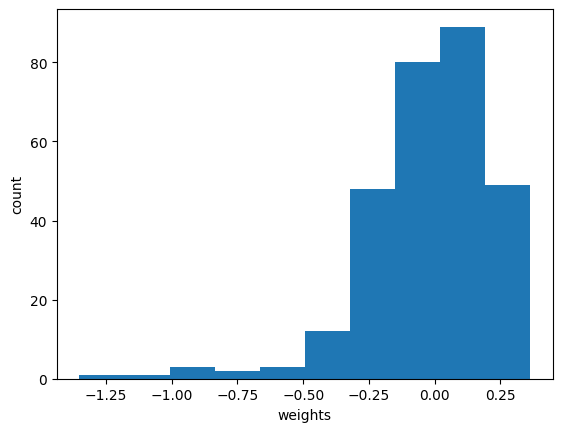

In [8]:
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1,1))
plt.xlabel("weights")
plt.ylabel("count")
plt.show()

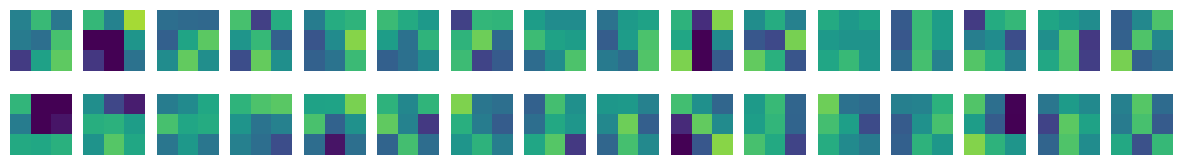

In [9]:
fig, axs = plt.subplots(2, 16, figsize=(15, 2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin= -0.5, vmax= 0.5)
        axs[i, j].axis('off')
plt.show()

In [10]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size =3, activation='relu', padding='same', input_shape=(28,28,1)))

/Users/chungseong-yun/hongong/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [12]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

-0.0008475532 0.082471415


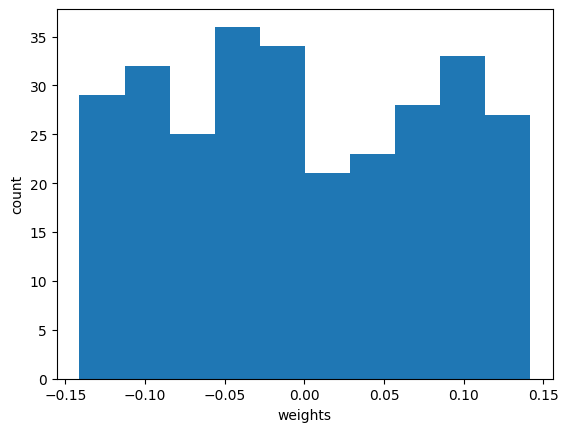

In [13]:
plt.hist(no_training_weights.reshape(-1,1))
plt.xlabel("weights")
plt.ylabel("count")
plt.show()

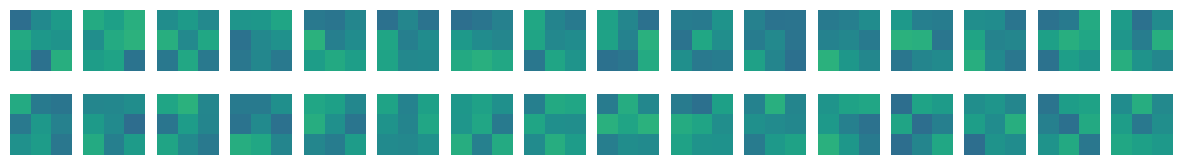

In [14]:
fig, axs = plt.subplots(2, 16, figsize=(15, 2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], vmin= -0.5, vmax= 0.5)
        axs[i, j].axis('off')
plt.show()

### 함수형 api

In [16]:
print(model.inputs)

[<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=False, name=input_layer>]


In [17]:
conv_acti = keras.Model(model.inputs, model.layers[0].output)

### 특성 맵 시각화

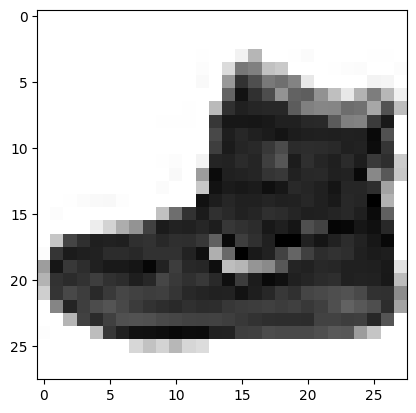

In [19]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [21]:
inputs = train_input[0:1].reshape(-1,28,28,1) / 255.0
feature_maps = conv_acti.predict(inputs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


/Users/chungseong-yun/hongong/.venv/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input_layer']
Received: inputs=Tensor(shape=(1, 28, 28, 1))
  warnings.warn(msg)


In [22]:
print(feature_maps.shape)

(1, 28, 28, 32)


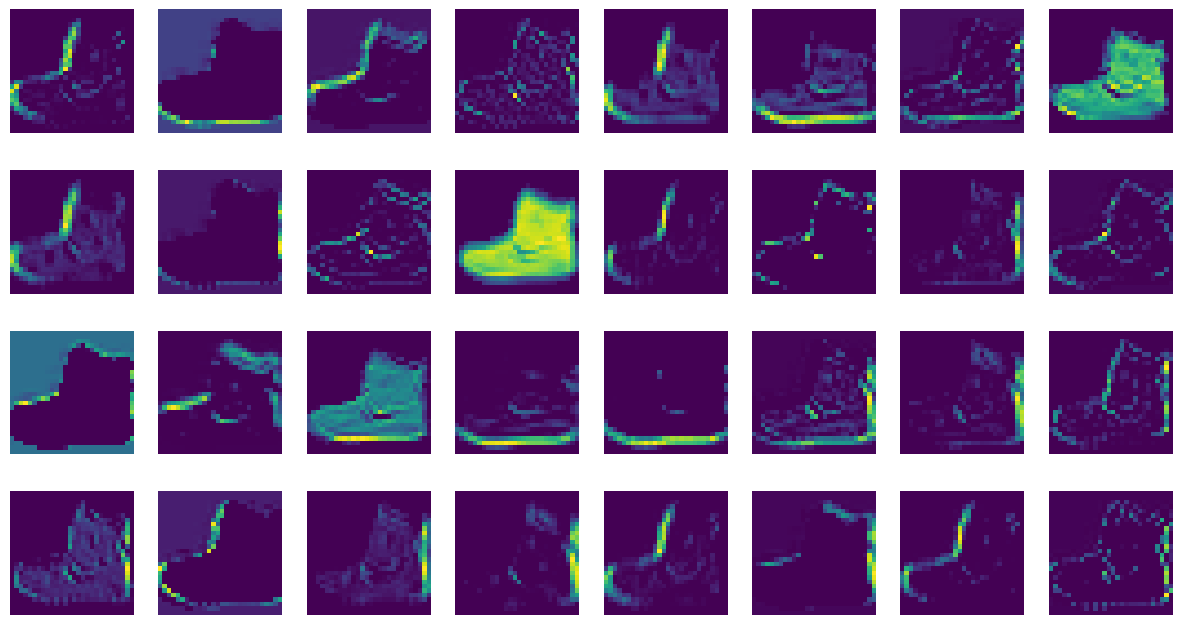

In [23]:
fig, axs = plt.subplots(4, 8, figsize=(15, 8))
for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')
plt.show()

In [24]:
conv2_acti = keras.Model(model.inputs, model.layers[1].output)

In [25]:
inputs = train_input[0:1].reshape(-1,28,28,1) / 255.0
feature_maps = conv_acti.predict(inputs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [26]:
print(feature_maps.shape)

(1, 28, 28, 32)


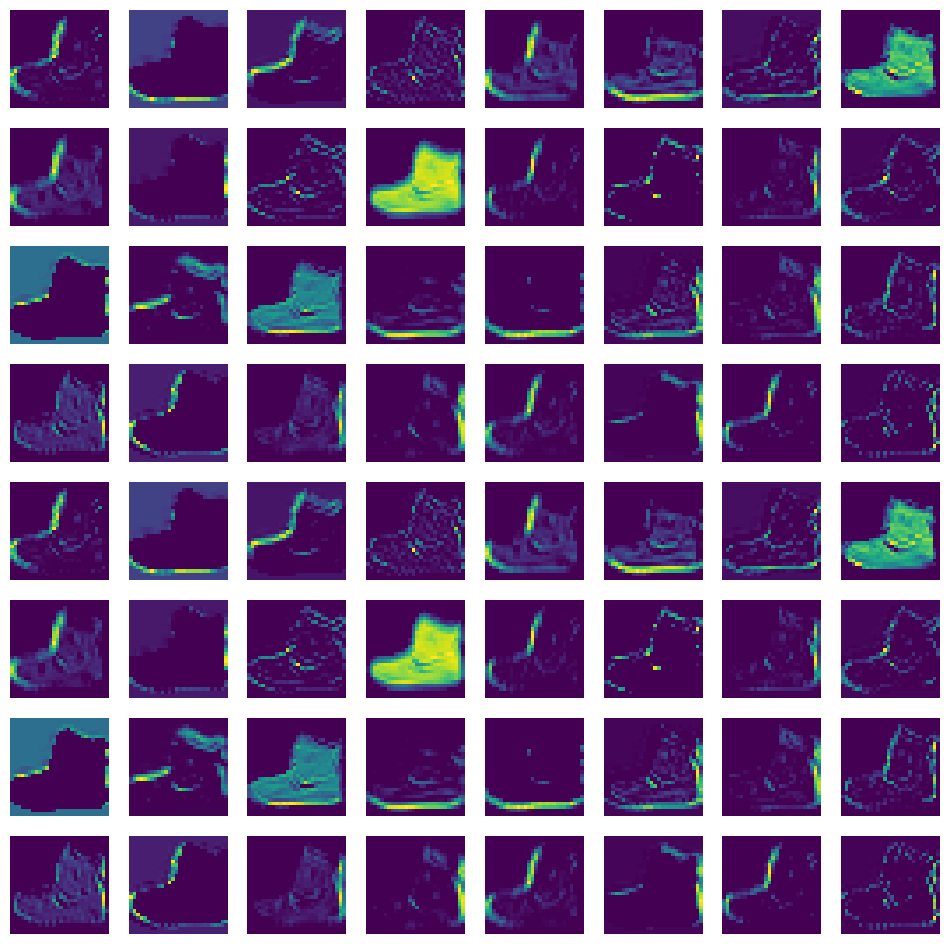

In [29]:
fig, axs = plt.subplots(8, 8, figsize=(12, 12))

for i in range(8):
    for j in range(8):
        idx = (i * 8 + j) % feature_maps.shape[3]  # 초과된 인덱스는 순환
        axs[i, j].imshow(feature_maps[0, :, :, idx])
        axs[i, j].axis('off')

plt.show()